## PCA Analysis Of Boston Dataset
The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes as shown below.

### Load the data


Notice that it stores the `target` variable from the data set as `house_prices`.

In [4]:
import pandas as pd
import sklearn.datasets as data
import matplotlib.pyplot as plt
%matplotlib inline

boston = data.load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
house_prices = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Identify categorical features
The cell below prints the description of the data set. Read this description and identify the feature that is  categorical.

**Remark**: The 'MEDV' feature is mentioned in the attribute information but it is not present in the features. The reason is that the 'MEDV' feature is the target variable. 

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Answer task 2:** 
CHAS, because its can take only limited set of values(0 & 1), so can be categorical.



### Remove categorical feature
Use the `drop` function to remove the categorical feature from the DataFrame.

In [6]:
boston_df_num = boston_df.drop(['CHAS'], axis=1)
boston_df_num

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Scaling the data 
Scale the features to zero mean and unit variance using `sklearn.preprocessing.StandardScaler`.

In [7]:
from sklearn.preprocessing import StandardScaler as ST
vals = boston_df_num.values
st = ST()
st.fit(vals)
boston_norm = st.transform(vals)
boston_norm

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Principal component analysis (PCA)
Perform a PCA of the scaled data set using `sklearn.decomposition.PCA`. 

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(boston_norm)
boston_pca = pca.transform(boston_norm)
boston_pca

array([[-2.09723388e+00, -7.20179037e-01,  9.28918527e-01, ...,
        -2.36309832e-02,  1.67257281e-02,  3.84502183e-01],
       [-1.45600300e+00, -9.47694267e-01, -1.80929693e-01, ...,
        -6.36977157e-01, -1.28409173e-01, -5.85986790e-02],
       [-2.07345404e+00, -6.25335747e-01,  6.74847604e-01, ...,
        -4.82718927e-01,  1.30602120e-01,  1.48632426e-03],
       ...,
       [-3.11283135e-01, -1.39524641e+00,  4.28959206e-01, ...,
         1.23697544e-01,  2.79915396e-01,  8.02436213e-02],
       [-2.69390828e-01, -1.35059004e+00,  1.88819337e-01, ...,
         9.43015619e-02,  2.99776661e-01,  7.07282092e-02],
       [-1.24525563e-01, -1.34293829e+00, -6.79494490e-01, ...,
         1.90430560e-01,  2.31480005e-01,  3.19274507e-02]])

### Scatter plot

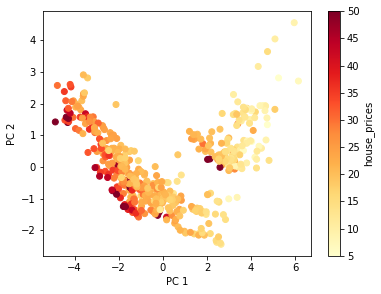

In [9]:
f = plt.figure(figsize=(6,4.5))
ax = f.gca()
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
dots = ax.scatter(boston_pca[:,0], boston_pca[:,1],
           c=house_prices,    # the 'c' parameter specifies the feature to use for coloring
           cmap='YlOrRd')     # the cmap parameter specifies the colormap
# adding colorbar
plt.colorbar(dots, label='house_prices')
f.savefig("fig1.png",dpi=150)

Sequencial colormaps(YlOrd), since all the values of house_price has one sign ie positive. So by using this colormap low to high house_price can be easly identified based on color intensity.

### PCA components

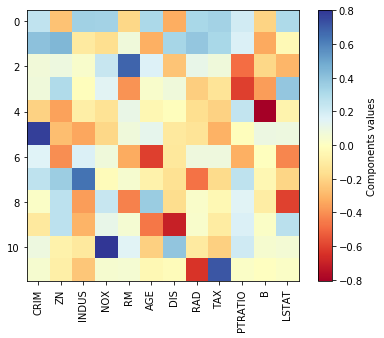

In [10]:
f = plt.figure(figsize=(7,5))
ax = f.gca()
img = ax.imshow(pca.components_, cmap='RdYlBu')
plt.colorbar(img,label='Components values')
ax.set_xticks(range(0,12))
t = ax.set_xticklabels(boston_df_num.columns, rotation=90)
f.savefig("fig2.png",dpi=75)

Diverging colormaps, since components has positive and negative values. By using this colormap it is easy to distinguish between positive and negative values.

### Scree plot 

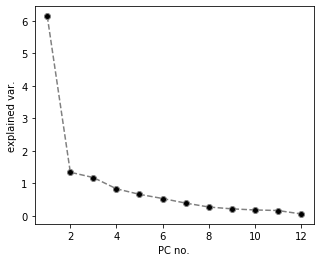

In [11]:
f = plt.figure(figsize=(5,4))
ax = f.gca()
ax.plot(range(1,13),pca.explained_variance_, marker='o',markerfacecolor='#000000',c = '#808080', linestyle='--')
ax.set_xlabel('PC no.')
ax.set_ylabel('explained var.')
f.savefig("fig3.svg")